In [1]:
# Capstone Project – Benessere dei Dipendenti
## Notebook 1: Data Cleaning e Preparazione

#In questo notebook effettuo la raccolta e la preparazione dei dati relativi alla descrizione 
#della situazione lavorativa, psicologica e fisica di una selezione di lavoratori

In [2]:
import pandas as pd
import os
import sqlalchemy

In [3]:
irwmh = pd.read_csv("C:/Users/2021/Desktop/EPICODE/Capstone_Project/data/Impact_of_Remote_Work_on_Mental_Health.csv",sep=';', encoding='latin1')

In [4]:
irwmh.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [5]:
irwmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [6]:
#Avendo studiato per bene il dataset, voglio gestire i null sostituendoli con il valore "Nothing" in quanto alcuni
#lavoratori non svolgono nessuna attività fisica periodica e non presentano una condizione di benessere mentale specifica

In [7]:
irwmh['Mental_Health_Condition'] = irwmh['Mental_Health_Condition'].fillna('Nothing')
irwmh['Physical_Activity'] = irwmh['Physical_Activity'].fillna('Nothing')

In [8]:
irwmh.info() #verifichiamo cosa è successo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            5000 non-null   object
 12  Access

In [9]:
irwmh.nunique() #vediamo i valori unici del dataset

Employee_ID                          5000
Age                                    39
Gender                                  4
Job_Role                                7
Industry                                7
Years_of_Experience                    35
Work_Location                           3
Hours_Worked_Per_Week                  41
Number_of_Virtual_Meetings             16
Work_Life_Balance_Rating                5
Stress_Level                            3
Mental_Health_Condition                 4
Access_to_Mental_Health_Resources       2
Productivity_Change                     3
Social_Isolation_Rating                 5
Satisfaction_with_Remote_Work           3
Company_Support_for_Remote_Work         5
Physical_Activity                       3
Sleep_Quality                           3
Region                                  6
dtype: int64

In [10]:
irwmh.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [11]:
#Controlliamo se ci sono duplicati nel dataset

In [13]:
duplicati = irwmh.duplicated().sum()
print(f"Number of duplicate rows: {duplicati}")

Number of duplicate rows: 0


In [14]:
#Contiamo per ogni Job Role quanti lavoratori ci sono
conteggio_job_role = irwmh['Job_Role'].value_counts()
print(conteggio_job_role)

Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64


In [15]:
#vediamo per ogni ruolo lavorativo quanto sono soddisfatti i lavoratori

In [16]:
jr_level_satisfaction = irwmh.groupby(['Job_Role','Satisfaction_with_Remote_Work'])['Employee_ID'].count()
jr_level_satisfaction

Job_Role           Satisfaction_with_Remote_Work
Data Scientist     Neutral                          221
                   Satisfied                        247
                   Unsatisfied                      228
Designer           Neutral                          228
                   Satisfied                        235
                   Unsatisfied                      260
HR                 Neutral                          240
                   Satisfied                        236
                   Unsatisfied                      240
Marketing          Neutral                          229
                   Satisfied                        219
                   Unsatisfied                      235
Project Manager    Neutral                          259
                   Satisfied                        238
                   Unsatisfied                      241
Sales              Neutral                          235
                   Satisfied                        258

In [17]:
#Vediamo, per quanti lavoratori, qual è la condizione di salute mentale in base al livello di stress

In [18]:
irwmh.groupby(['Stress_Level','Mental_Health_Condition'])['Employee_ID'].count()

Stress_Level  Mental_Health_Condition
High          Anxiety                    438
              Burnout                    445
              Depression                 401
              Nothing                    402
Low           Anxiety                    428
              Burnout                    413
              Depression                 416
              Nothing                    388
Medium        Anxiety                    412
              Burnout                    422
              Depression                 429
              Nothing                    406
Name: Employee_ID, dtype: int64

In [19]:
#Per creare uno star schema ho bisogno di spezzettare il dataset in più tabelle individuando fatti e dimensioni

In [20]:
#Decido di creare 4 tabelle: FactMentalHealth, DimEmployee, DimWork e DimWellness

In [22]:
#Creo prima work_cols perchè così poi potrò fare una merge con il dataset principale per crearmi la tabella dei fatti

In [23]:
work_cols = [
    'Work_Location',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Company_Support_for_Remote_Work'
]
dim_work = irwmh[work_cols].drop_duplicates().reset_index(drop=True)
dim_work.insert(0, 'Work_ID', range(1, len(dim_work) + 1))

In [24]:
wellness_cols = [
    'Mental_Health_Condition',
    'Access_to_Mental_Health_Resources',
    'Physical_Activity',
    'Sleep_Quality'
]
dim_wellness = irwmh[wellness_cols].drop_duplicates().reset_index(drop=True)
dim_wellness.insert(0, 'Wellness_ID', range(1, len(dim_wellness) + 1))

In [25]:
dim_employee = irwmh[[
    'Employee_ID',
    'Age',
    'Gender',
    'Region',
    'Industry',
    'Job_Role',
    'Years_of_Experience'
]].drop_duplicates(subset=['Employee_ID']).reset_index(drop=True)

In [26]:
irwmh = irwmh.merge(dim_work, on=work_cols, how='left')
irwmh = irwmh.merge(dim_wellness, on=wellness_cols, how='left')

In [27]:
irwmh.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Work_ID,Wellness_ID
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,1,1
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,No,Increase,3,Satisfied,2,Weekly,Good,Asia,2,2
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,No,No Change,4,Unsatisfied,5,Nothing,Poor,North America,3,3
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Yes,Increase,3,Unsatisfied,3,Nothing,Poor,Europe,4,4
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,5,5


In [28]:
#Dopo il merge posso creare la fact table

In [29]:
fact_cols = [
    'Employee_ID',
    'Work_ID',
    'Wellness_ID',
    'Stress_Level',
    'Work_Life_Balance_Rating',
    'Productivity_Change',
    'Social_Isolation_Rating',
    'Satisfaction_with_Remote_Work'
]
fact_remote_work = irwmh[fact_cols].copy()

In [30]:
fact_remote_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    5000 non-null   object
 1   Work_ID                        5000 non-null   int64 
 2   Wellness_ID                    5000 non-null   int64 
 3   Stress_Level                   5000 non-null   object
 4   Work_Life_Balance_Rating       5000 non-null   int64 
 5   Productivity_Change            5000 non-null   object
 6   Social_Isolation_Rating        5000 non-null   int64 
 7   Satisfaction_with_Remote_Work  5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [31]:
#Controlliamo se i dati sono consistenti e se ci sono dei null

In [32]:
print(f"dim_employee → {dim_employee.shape}")
print(f"dim_work → {dim_work.shape}")
print(f"dim_wellness → {dim_wellness.shape}")
print(f"fact_remote_work → {fact_remote_work.shape}")

dim_employee → (5000, 7)
dim_work → (3933, 5)
dim_wellness → (72, 5)
fact_remote_work → (5000, 8)


In [33]:
#Dunque possiamo vedere come dim_work e dim_wellness presentano record minori in quanto lo scopo è stato anche di eliminare la ridondanza
#poichè, ad esempio, magari diversi lavoratori hanno in comune lo stesso profilo di benessere

In [34]:
#Vediamo se ci sono nulli in tutte le tabelle

In [35]:
print(dim_employee.isnull().sum())
print(dim_work.isnull().sum())
print(dim_wellness.isnull().sum())
print(fact_remote_work.isnull().sum())

Employee_ID            0
Age                    0
Gender                 0
Region                 0
Industry               0
Job_Role               0
Years_of_Experience    0
dtype: int64
Work_ID                            0
Work_Location                      0
Hours_Worked_Per_Week              0
Number_of_Virtual_Meetings         0
Company_Support_for_Remote_Work    0
dtype: int64
Wellness_ID                          0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Physical_Activity                    0
Sleep_Quality                        0
dtype: int64
Employee_ID                      0
Work_ID                          0
Wellness_ID                      0
Stress_Level                     0
Work_Life_Balance_Rating         0
Productivity_Change              0
Social_Isolation_Rating          0
Satisfaction_with_Remote_Work    0
dtype: int64


In [36]:
dim_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Work_ID                          3933 non-null   int64 
 1   Work_Location                    3933 non-null   object
 2   Hours_Worked_Per_Week            3933 non-null   int64 
 3   Number_of_Virtual_Meetings       3933 non-null   int64 
 4   Company_Support_for_Remote_Work  3933 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 153.8+ KB


In [37]:
dim_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee_ID          5000 non-null   object
 1   Age                  5000 non-null   int64 
 2   Gender               5000 non-null   object
 3   Region               5000 non-null   object
 4   Industry             5000 non-null   object
 5   Job_Role             5000 non-null   object
 6   Years_of_Experience  5000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 273.6+ KB


In [38]:
dim_wellness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Wellness_ID                        72 non-null     int64 
 1   Mental_Health_Condition            72 non-null     object
 2   Access_to_Mental_Health_Resources  72 non-null     object
 3   Physical_Activity                  72 non-null     object
 4   Sleep_Quality                      72 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [39]:
fact_remote_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    5000 non-null   object
 1   Work_ID                        5000 non-null   int64 
 2   Wellness_ID                    5000 non-null   int64 
 3   Stress_Level                   5000 non-null   object
 4   Work_Life_Balance_Rating       5000 non-null   int64 
 5   Productivity_Change            5000 non-null   object
 6   Social_Isolation_Rating        5000 non-null   int64 
 7   Satisfaction_with_Remote_Work  5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [40]:
#Inizio a salvarmeli in csv

In [41]:
dim_employee.to_csv('C:/Users/2021/Desktop/EPICODE/Capstone_Project/data/dim_employee.csv', index=False)
dim_work.to_csv('C:/Users/2021/Desktop/EPICODE/Capstone_Project/data/dim_work.csv', index=False)
dim_wellness.to_csv('C:/Users/2021/Desktop/EPICODE/Capstone_Project/data/dim_wellness.csv', index=False)
fact_remote_work.to_csv('C:/Users/2021/Desktop/EPICODE/Capstone_Project/data/fact_remote_work.csv', index=False)

In [42]:
import seaborn as sns

In [43]:
#Vediamo alcuni grafici che ci mostrano la distribuzione dei vari dati 

In [44]:
import matplotlib.pyplot as plt

In [45]:
#Distribuzione delle sedi lavorative

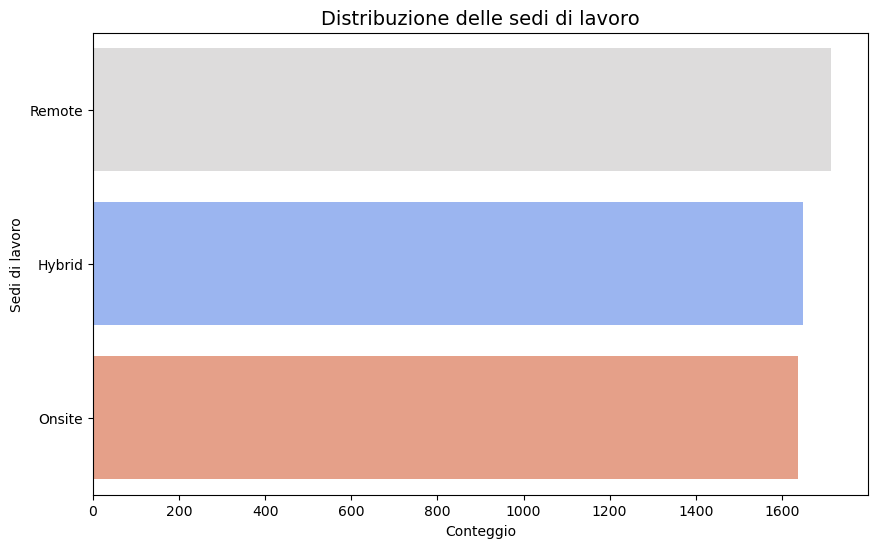

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Work_Location', data=irwmh, order=irwmh['Work_Location'].value_counts().index, hue= 'Work_Location',palette='coolwarm')
plt.title("Distribuzione delle sedi di lavoro", fontsize=14)
plt.xlabel("Conteggio")
plt.ylabel("Sedi di lavoro")
plt.show()

In [47]:
#Vediamo la distribuzione delle ore passate al lavoro settimanalmente

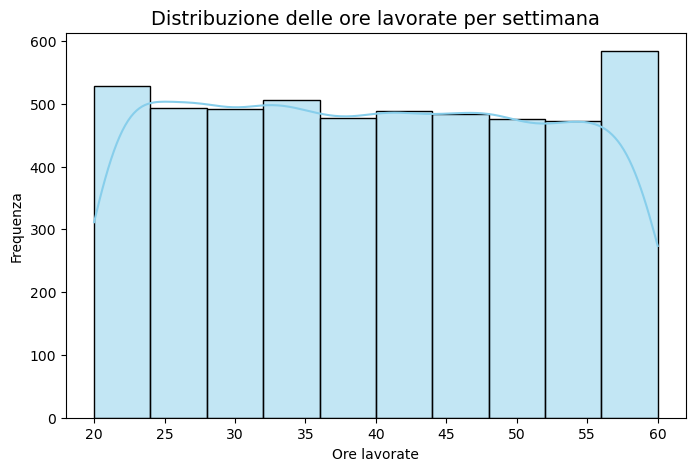

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(irwmh['Hours_Worked_Per_Week'], bins=10, kde=True, color='skyblue')
plt.title("Distribuzione delle ore lavorate per settimana", fontsize=14)
plt.xlabel("Ore lavorate")
plt.ylabel("Frequenza")
plt.show()

In [49]:
#Vediamo la distribuzione dell'età dei dipendenti

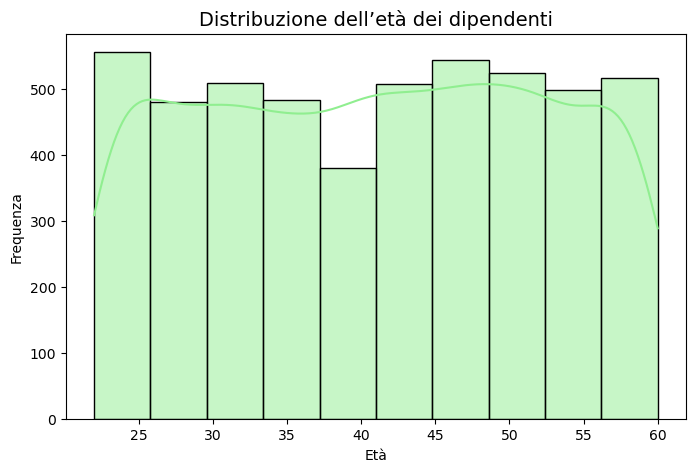

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(irwmh['Age'], bins=10, kde=True, color='lightgreen')
plt.title("Distribuzione dell’età dei dipendenti", fontsize=14)
plt.xlabel("Età")
plt.ylabel("Frequenza")
plt.show()

In [51]:
#Vediamo la distribuzione invece del genere dei dipendenti

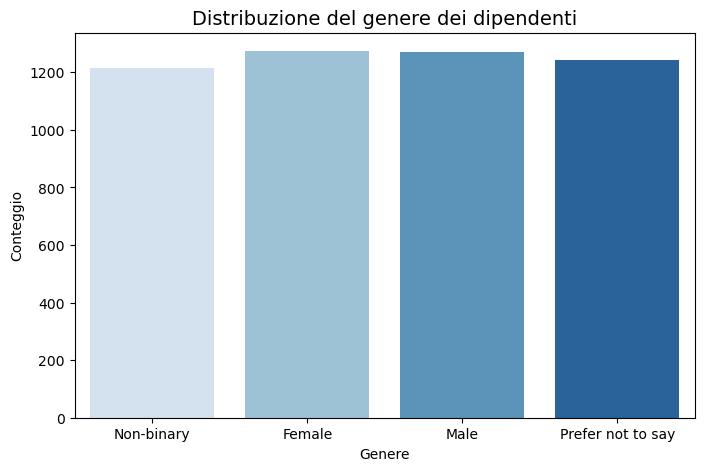

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=irwmh, hue='Gender', palette='Blues', legend=False)
plt.title("Distribuzione del genere dei dipendenti", fontsize=14)
plt.xlabel("Genere")
plt.ylabel("Conteggio")
plt.show()

In [53]:
#Distribuzione del ruolo lavorativo

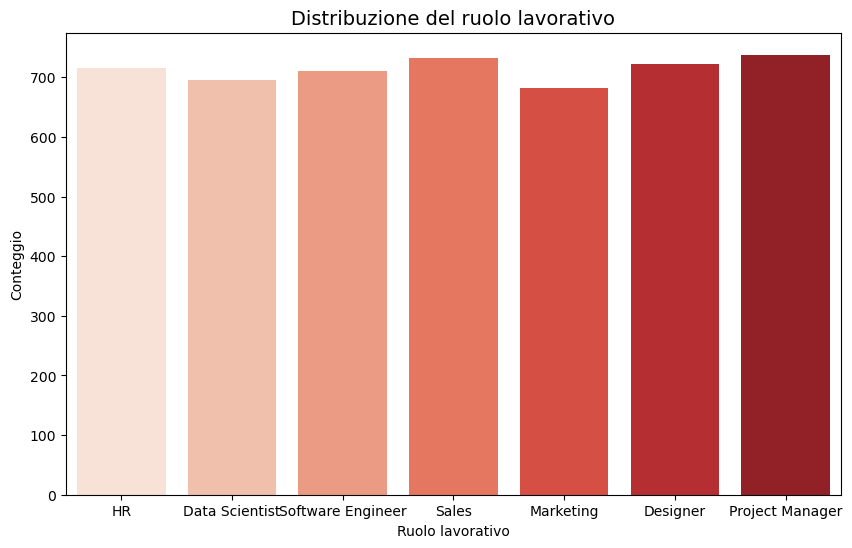

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Job_Role', data=irwmh, hue='Job_Role', palette='Reds', legend=False)
plt.title("Distribuzione del ruolo lavorativo", fontsize=14)
plt.xlabel("Ruolo lavorativo")
plt.ylabel("Conteggio")
plt.show()

In [55]:
#Distribuzione della tipologia di settore lavorativo

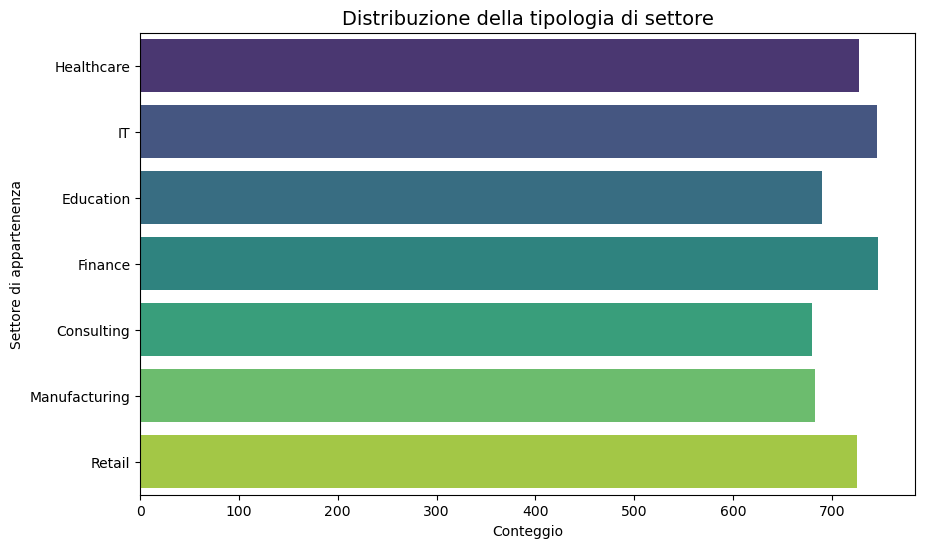

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=irwmh, hue='Industry', palette='viridis')
plt.title("Distribuzione della tipologia di settore", fontsize=14)
plt.xlabel("Conteggio")
plt.ylabel("Settore di appartenenza")
plt.show()

In [57]:
#Distribuzione degli anni di esperienza lavorativa

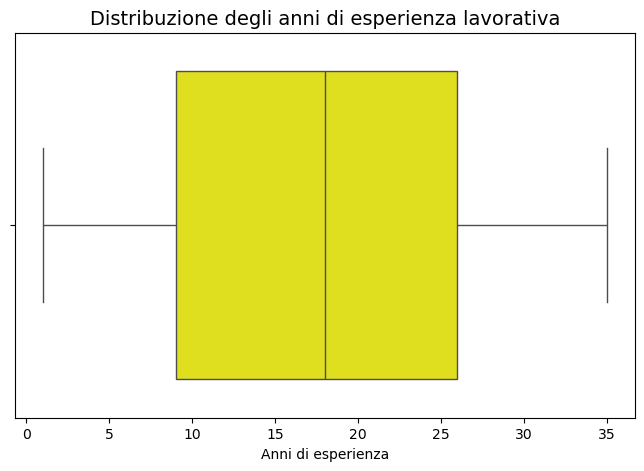

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Years_of_Experience', data=irwmh, color='yellow')
plt.title("Distribuzione degli anni di esperienza lavorativa", fontsize=14)
plt.xlabel("Anni di esperienza")
plt.show()

In [59]:
#Distribuzione della condizione sulla salute mentale

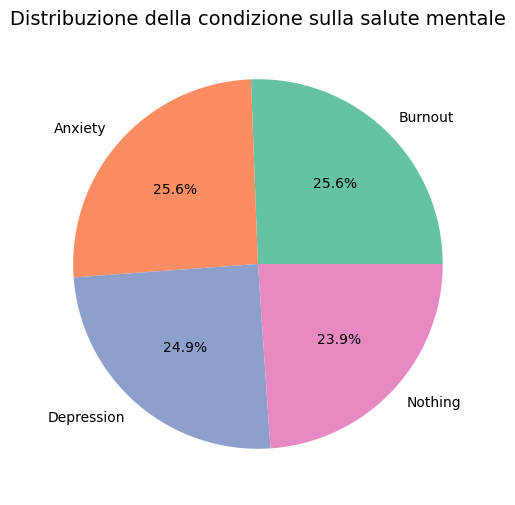

In [60]:
plt.figure(figsize=(10, 6))
irwmh['Mental_Health_Condition'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Distribuzione della condizione sulla salute mentale", fontsize=14)
plt.ylabel("")
plt.show()

In [61]:
#Distribuzione del livello di stress dei dipendenti

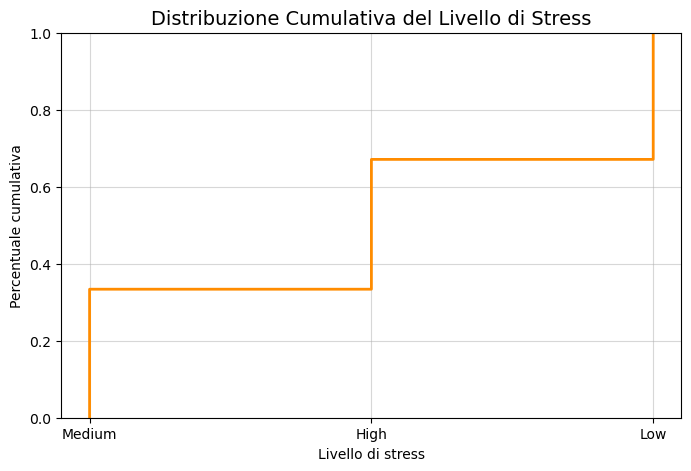

In [62]:
plt.figure(figsize=(8,5))
sns.ecdfplot(data=irwmh, x='Stress_Level', color='darkorange', linewidth=2)
plt.title('Distribuzione Cumulativa del Livello di Stress', fontsize=14)
plt.xlabel('Livello di stress')
plt.ylabel('Percentuale cumulativa')
plt.grid(alpha=0.5)
plt.show()

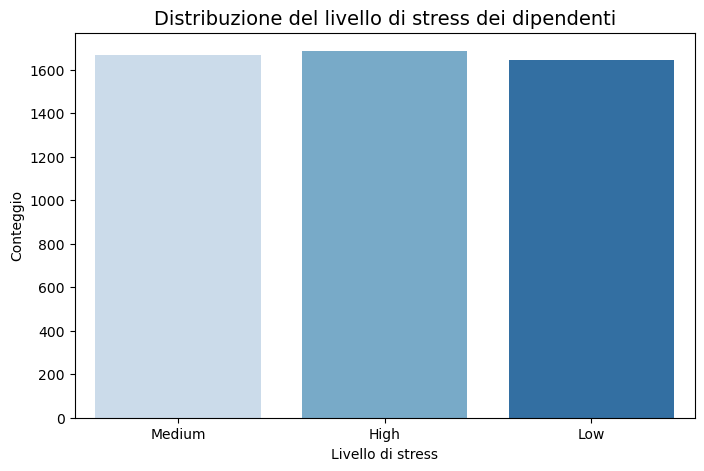

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Stress_Level', data=irwmh, hue='Stress_Level', palette='Blues', legend=False)
plt.title("Distribuzione del livello di stress dei dipendenti", fontsize=14)
plt.xlabel("Livello di stress")
plt.ylabel("Conteggio")
plt.show()

In [64]:
#Distribuzione della soddisfazione lavorativa

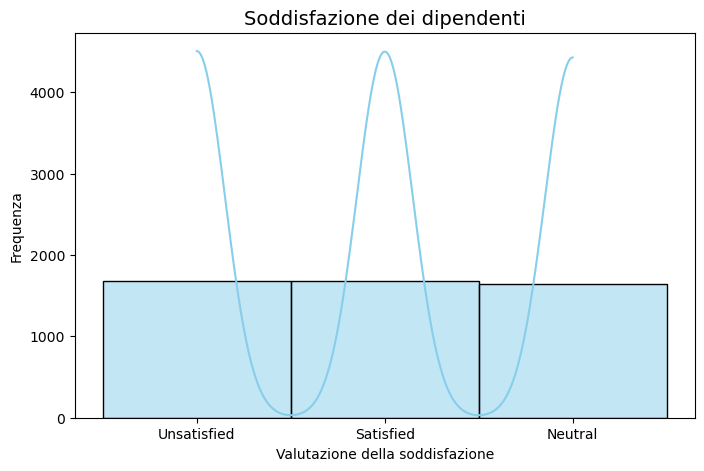

In [65]:
plt.figure(figsize=(8, 5))
sns.histplot(irwmh['Satisfaction_with_Remote_Work'], kde=True, color='skyblue')
plt.title("Soddisfazione dei dipendenti", fontsize=14)
plt.xlabel("Valutazione della soddisfazione")
plt.ylabel("Frequenza")
plt.show()

In [66]:
#Distribuzione della qualità del sonno

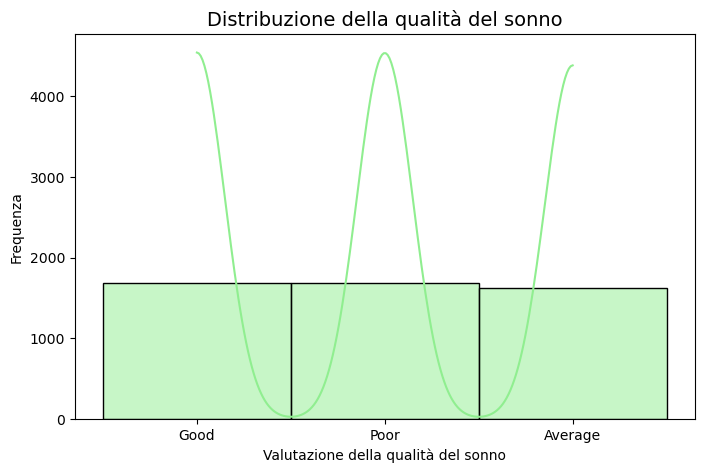

In [67]:
plt.figure(figsize=(8, 5))
sns.histplot(irwmh['Sleep_Quality'], kde=True, color='lightgreen')
plt.title("Distribuzione della qualità del sonno", fontsize=14)
plt.xlabel("Valutazione della qualità del sonno")
plt.ylabel("Frequenza")
plt.show()

In [68]:
#Distribuzione delle condizioni di salute mentale per fascia d’età

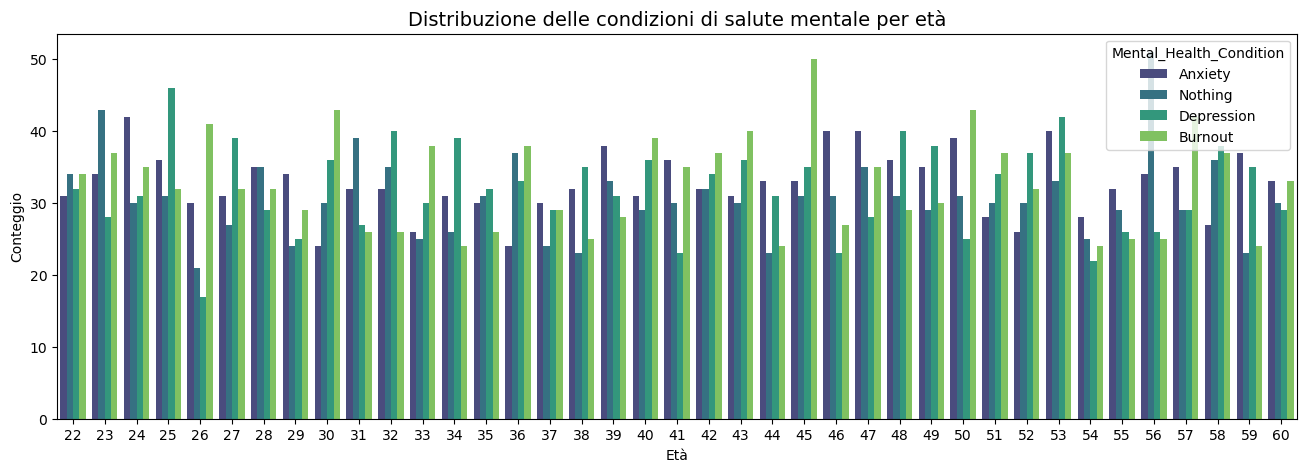

In [93]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Age', hue='Mental_Health_Condition', data=irwmh, palette='viridis')
plt.title("Distribuzione delle condizioni di salute mentale per età", fontsize=14)
plt.xlabel("Età")
plt.ylabel("Conteggio")
plt.show()

In [70]:
#Distribuzione delle condizioni di salute mentale per genere

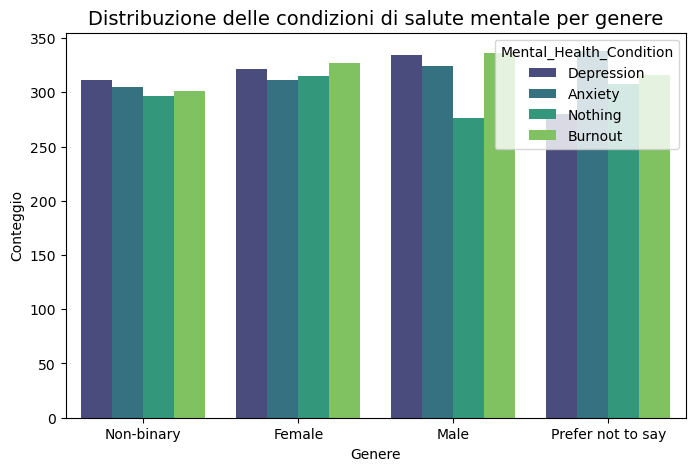

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Mental_Health_Condition', data=irwmh, palette='viridis')
plt.title("Distribuzione delle condizioni di salute mentale per genere", fontsize=14)
plt.xlabel("Genere")
plt.ylabel("Conteggio")
plt.show()

In [72]:
#Relazione tra attività fisica e condizione di salute mentale

C:\Users\2021\AppData\Local\Temp\ipykernel_24384\360139159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mental_Health_Condition', y='Physical_Activity', data=irwmh, palette='pastel')


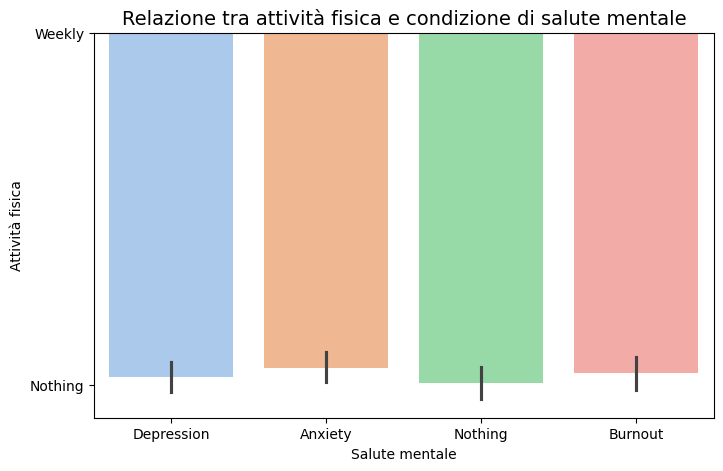

In [73]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Mental_Health_Condition', y='Physical_Activity', data=irwmh, palette='pastel')
plt.title("Relazione tra attività fisica e condizione di salute mentale", fontsize=14)
plt.xlabel("Salute mentale")
plt.ylabel("Attività fisica")
plt.show()

In [74]:
#Si nota che la maggior parte delle persone, indipendentemente dalla condizione mentale, pratica attività fisica settimanale
#Questo suggerisce che l’attività fisica non è un fattore esclusivo di salute mentale, ma può comunque influire positivamente sulla percezione del benessere.

In [75]:
#Vediamo ora la relazione tra le ore lavorate sulla valutazione dell'equilibrio tra lavoro e vita privata

C:\Users\2021\AppData\Local\Temp\ipykernel_24384\301624793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Work_Life_Balance_Rating', y='Hours_Worked_Per_Week', data=irwmh, palette='coolwarm')


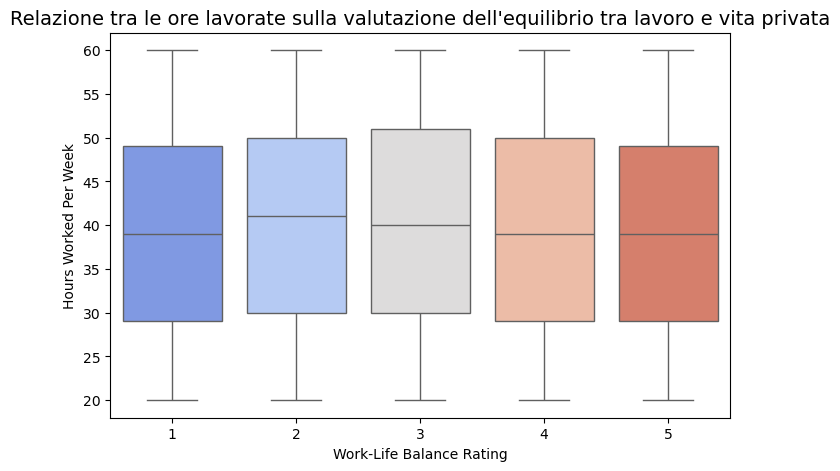

In [76]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Work_Life_Balance_Rating', y='Hours_Worked_Per_Week', data=irwmh, palette='coolwarm')
plt.title("Relazione tra le ore lavorate sulla valutazione dell'equilibrio tra lavoro e vita privata", fontsize=14)
plt.xlabel("Work-Life Balance Rating")
plt.ylabel("Hours Worked Per Week")
plt.show()

In [77]:
#Le persone che segnalano un bilancio tra lavoro e vita privata peggiore (punteggio 1) sembrano comunque lavorare un numero simile di ore rispetto 
#a chi ha una valutazione migliore (punteggio 5), il che potrebbe suggerire che il bilancio percepito non influenzi direttamente il numero di ore lavorate.

In [78]:
# Creiamo delle fasce d'età
fasce = [18, 25, 35, 45, 55, 65, 100]
etichette = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
irwmh['Age_Group'] = pd.cut(irwmh['Age'], bins=fasce, labels=etichette, right=False)

In [79]:
# Calcoliamo il numero dei lavoratori da remoto in ogni fascia d'età
conteggio_rw = irwmh[irwmh['Work_Location'] == 'Remote']['Age_Group'].value_counts().sort_index()

C:\Users\2021\AppData\Local\Temp\ipykernel_24384\3720798148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteggio_rw.index, y=conteggio_rw.values, palette='pastel')


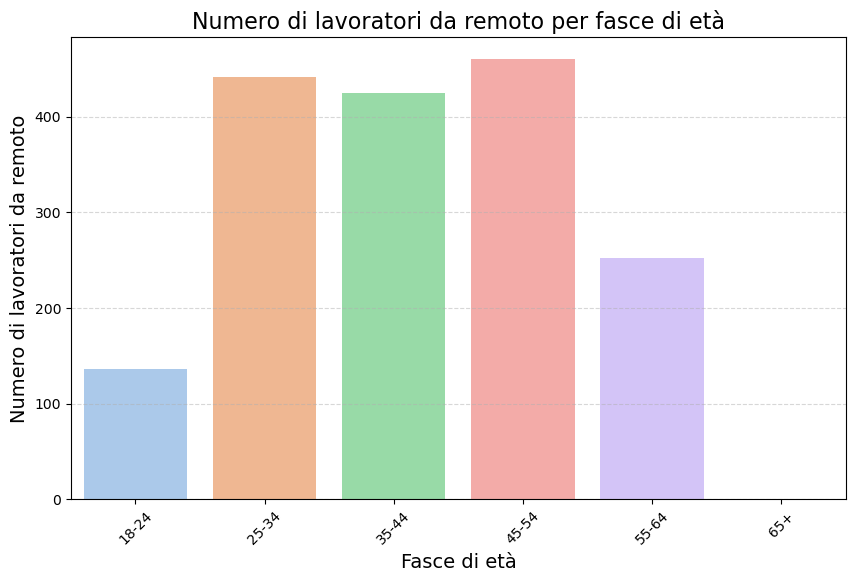

In [80]:
# Mostriamo in figura la distribuzione del numero di lavoratori da remoto per fasce d'età
plt.figure(figsize=(10, 6))
sns.barplot(x=conteggio_rw.index, y=conteggio_rw.values, palette='pastel')
plt.title('Numero di lavoratori da remoto per fasce di età', fontsize=16)
plt.xlabel('Fasce di età', fontsize=14)
plt.ylabel('Numero di lavoratori da remoto', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [81]:
#I lavoratori con età compresa tra 25 e 34 anni e tra 45 e 54 anni hanno una probabilità significativamente maggiore di lavorare da remoto

In [82]:
# Vediamo ora in base al genere qual è la distribuzione percentuale dei lavoratori da remoto

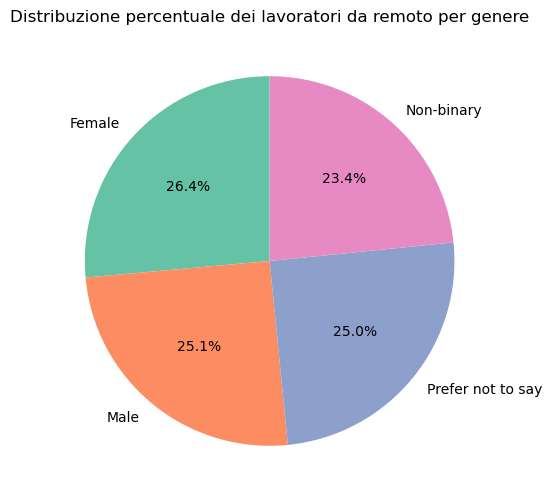

In [85]:
conteggio_rw = irwmh[irwmh['Work_Location'] == 'Remote']['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(conteggio_rw, labels=conteggio_rw.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Distribuzione percentuale dei lavoratori da remoto per genere')
plt.show()

In [86]:
# Vediamo la condizione di salute mentale per ruolo lavorativo

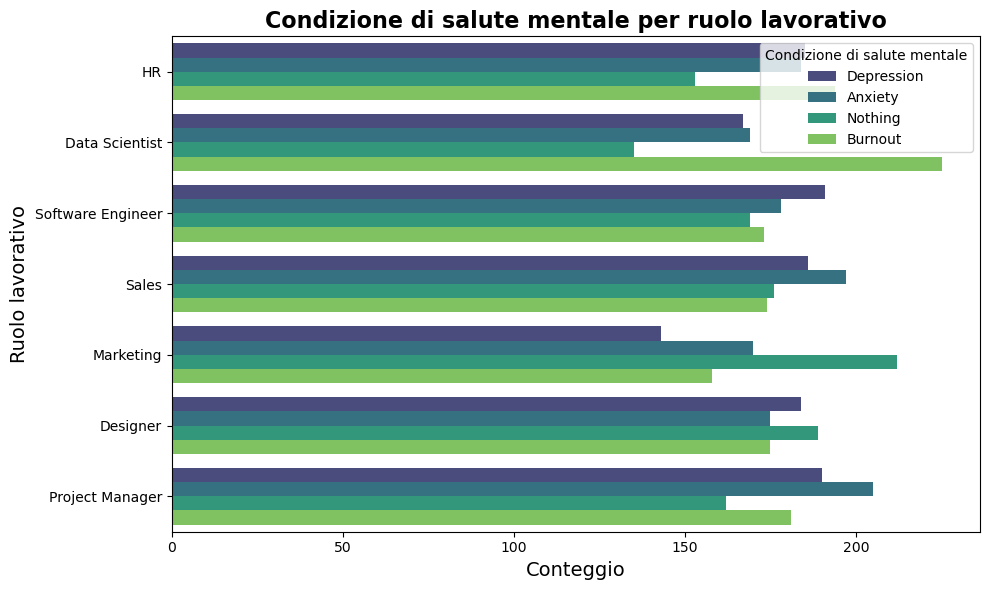

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Job_Role', hue='Mental_Health_Condition', data=irwmh, palette='viridis')
plt.title('Condizione di salute mentale per ruolo lavorativo', fontsize=16, fontweight='bold')
plt.xlabel('Conteggio', fontsize=14)
plt.ylabel('Ruolo lavorativo', fontsize=14)
plt.legend(title='Condizione di salute mentale')
plt.tight_layout()
plt.show()

In [88]:
#Possiamo vedere come il burnout è la condizione di salute mentale più diffusa

In [89]:
# Mi sembra corretto fare anche un grafico geografico per mostrare la distribuzione della condizione di salute mentale per Continente

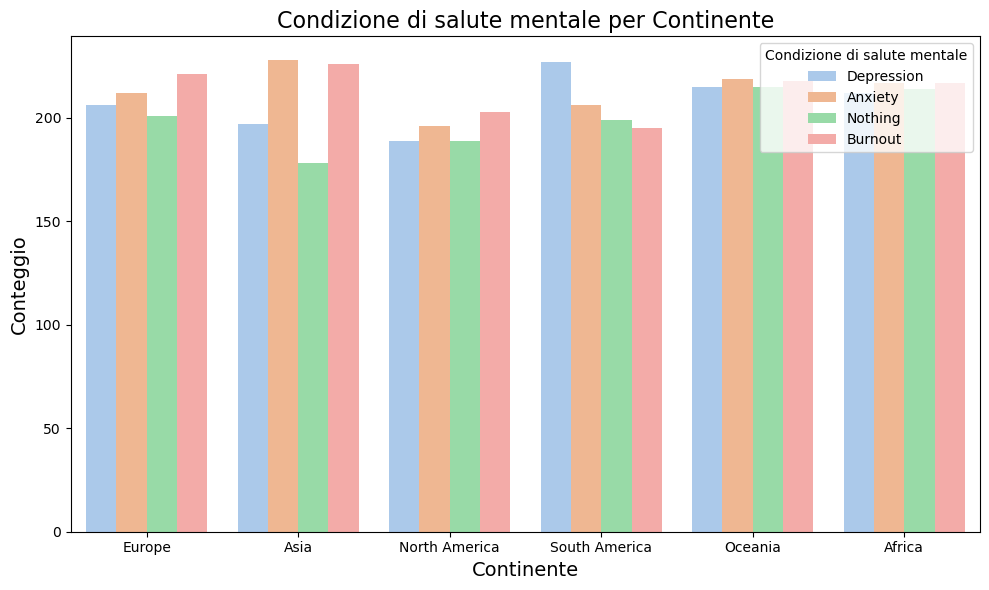

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Mental_Health_Condition', data=irwmh, palette='pastel')
plt.title('Condizione di salute mentale per Continente', fontsize=16)
plt.xlabel('Continente', fontsize=14)
plt.ylabel('Conteggio', fontsize=14)
plt.legend(title='Condizione di salute mentale')
plt.tight_layout()
plt.show()

In [91]:
#Ho voluto mostrare una piccola parte delle informazioni che possiamo trarre dai dati preparati attraverso Python, ma per la visualizzazione 
# di insights strategici ho preparato un report di PowerBI